In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.attack import *
from src.create import *
from src.measure import *
import networkx as nx

# RANDOM NETWORK

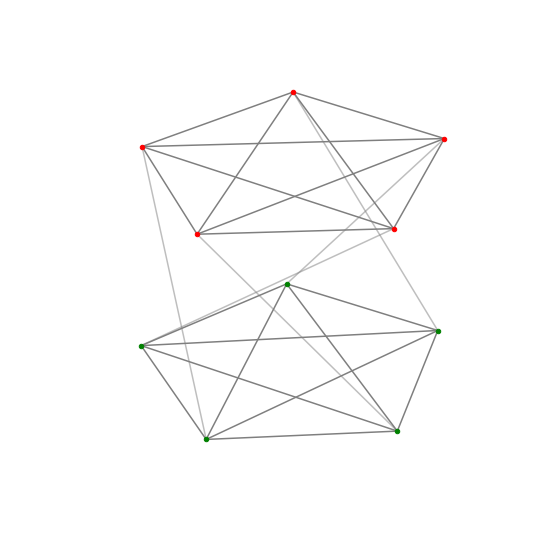

In [8]:
ER_a = networkER_w_3Dpos(5,5,1)
ER_b = networkER_w_3Dpos(5,5,2)

intd_ER = intd_random_net(ER_a,ER_b)
a = intd_ER.nodes()
intdNetworkDraw(intd_ER)
# numb = intd_ER.nodes['a-1']['num']

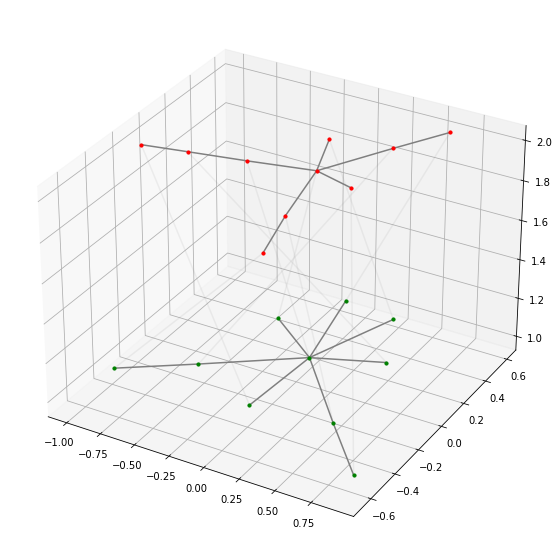

In [9]:
BA_a = networkSF_w_3Dpos_BA(10,1,1)
BA_b = networkSF_w_3Dpos_BA(10,1,2)

intd_BA = intd_random_net(BA_a,BA_b)

intdNetworkDraw(intd_BA,10)

In while
In while
In while
In while
In while
In while
In while
In whilegress: 93%
In whilegress: 94%
In whilegress: 95%
In whilegress: 94%
In while
In while
In while
In while
In while
In whilegress: 95%
In while
In while
In while
In whilegress: 95%
In while
In while
In while
In whilegress: 94%
In while
In whilegress: 94%
In whilegress: 92%
In while
In while
In whilegress: 95%
In while
In whilegress: 94%
In whilegress: 95%
In while
In while
In while
In whilegress: 94%
In while
In whilegress: 93%
In while
In whilegress: 95%
In whilegress: 95%
In while
In while
In while
In whilegress: 93%
In while
In whilegress: 93%
In whilegress: 95%
In while
In whilegress: 94%
In while
In while
In while
In while
In whilegress: 94%
In whilegress: 94%
In while
In whilegress: 95%
In whilegress: 92%
In whilegress: 94%
In whilegress: 95%
In whilegress: 95%
In while
In whilegress: 94%
In while
In whilegress: 92%
In whilegress: 94%
In whilegress: 94%
In whilegress: 94%
In while
In whilegress: 94%
In while
In w

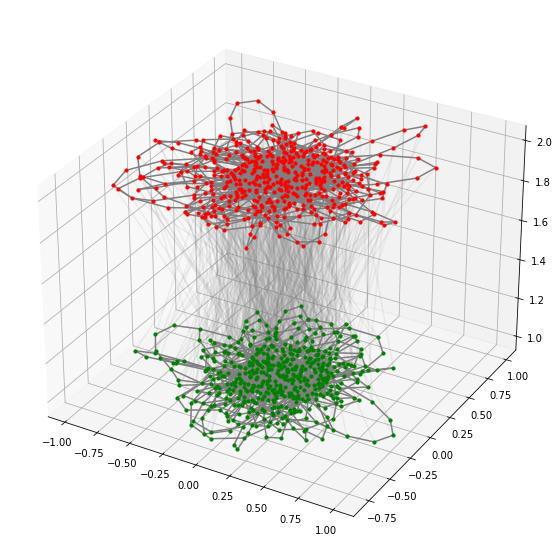

In [10]:
PowerL_a = networkSF_w_3Dpos_PowerL(500,3,1)
PowerL_b = networkSF_w_3Dpos_PowerL(500,3,2)

intd_PowerL = intd_random_net(PowerL_a,PowerL_b)

intdNetworkDraw(intd_PowerL,10)

# PARIS NETWORK